# 4. Explore the Data

> "I don't know, what I don't know"

We want to first **visually explore** the data to see if we can confirm some of our initial hypotheses as well as make new hypothesis about the problem we are trying to solve.

For this we will start by loading the data and understanding the data structure of the dataframe we have.

## Lets read the data

In [3]:
# Import the library we need, which is dplyr and ggplot2
library(dplyr)
library(ggplot2)

In [86]:
options(repr.plot.width=10, repr.plot.height=6)

You will find the variable `df` used quite often to store a `dataframe`

In [4]:
# Read the csv file of Monthwise Quantity and Price csv file we have.
df <- read.csv('MonthWiseMarketArrivals_clean.csv')

## Understand Data Structure and Types

In [5]:
dim(df)

[1] 10227    10

In [6]:
head(df)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
1,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
2,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
3,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
4,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
5,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012
6,ABOHAR(PB),January,2013,675,1327,1900,1605,PB,ABOHAR,January-2013


### Data Structure

So we have ten columns in our dataset. Let us understand what each one is.

Three are about the location of the Wholesale Market where Onion where sold.
- **state**: This is the 2/3 letter abbreviation for the state in India (PB is Punjab and so on)
- **city**: This is the city in India (ABOHAR, BANGALORE and so on)
- **market**: This is a string with the combination of the state and city

Three are related to the 
- **month**: Month in January, February and so on. 
- **year**: Year in YYYY representastion
- **date**: The combination of the two above.

Four are about quantity and price in these wholesale market. 
- **quantity**: The quanity of Onion arriving in the market in that month in quintals (100 kg)
- **priceMin**: The minimum price in the month in Rs./quintal
- **priceMax**: The maximum price in the month in Rs./quintal
- **priceMod**: The modal price in the month in Rs./quintal

We would expect the following the columns to be of the following type
- **CATEGORICAL**: state, city, market
- **TIME INTERVAL**: month, year, date
- **QUANTITATIVE**: quantity, priceMin, priceMax, priceModal

Let us see what pandas dataframe is reading these columns as.

In [7]:
# Get the structure of the data frame
str(df)

'data.frame':	10227 obs. of  10 variables:
 $ market  : Factor w/ 120 levels "ABOHAR(PB)","AGRA(UP)",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ month   : Factor w/ 12 levels "April","August",..: 5 5 5 5 5 5 5 5 4 4 ...
 $ year    : int  2005 2006 2010 2011 2012 2013 2014 2015 2005 2006 ...
 $ quantity: int  2350 900 790 245 1035 675 440 1305 1400 1800 ...
 $ priceMin: int  404 487 1283 3067 523 1327 1025 1309 286 343 ...
 $ priceMax: int  493 638 1592 3750 686 1900 1481 1858 365 411 ...
 $ priceMod: int  446 563 1460 3433 605 1605 1256 1613 324 380 ...
 $ state   : Factor w/ 21 levels "AP","ASM","BHR",..: 17 17 17 17 17 17 17 17 17 17 ...
 $ city    : Factor w/ 117 levels "ABOHAR","AGRA",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ date    : Factor w/ 242 levels "April-1996","April-1997",..: 91 92 96 97 98 99 100 101 70 71 ...


So we are getting the quantitive columns are correctly being shown as integers and the categorical columns are showing as objects(strings) which is fine. 
However, the `date` columns is being read as an object and not a Time-Interval. Let us at least fix the `date` column and make it into a datetime object

In [8]:
as.Date("01-April-2016", "%d-%B-%Y")

[1] "2016-04-01"

In [9]:
# Changing the date column to a Time Interval columnn
df$date = as.Date(paste("01-",df$date,sep=""), "%d-%B-%Y")

In [10]:
# Now checking for type of each column
str(df)

'data.frame':	10227 obs. of  10 variables:
 $ market  : Factor w/ 120 levels "ABOHAR(PB)","AGRA(UP)",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ month   : Factor w/ 12 levels "April","August",..: 5 5 5 5 5 5 5 5 4 4 ...
 $ year    : int  2005 2006 2010 2011 2012 2013 2014 2015 2005 2006 ...
 $ quantity: int  2350 900 790 245 1035 675 440 1305 1400 1800 ...
 $ priceMin: int  404 487 1283 3067 523 1327 1025 1309 286 343 ...
 $ priceMax: int  493 638 1592 3750 686 1900 1481 1858 365 411 ...
 $ priceMod: int  446 563 1460 3433 605 1605 1256 1613 324 380 ...
 $ state   : Factor w/ 21 levels "AP","ASM","BHR",..: 17 17 17 17 17 17 17 17 17 17 ...
 $ city    : Factor w/ 117 levels "ABOHAR","AGRA",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ date    : Date, format: "2005-01-01" "2006-01-01" ...


In [11]:
# Let us see the dataframe again now
head(df)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
1,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
2,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
3,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
4,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
5,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01
6,ABOHAR(PB),January,2013,675,1327,1900,1605,PB,ABOHAR,2013-01-01


## Question 1 - How big is the Bangalore onion market compared to other cities in India?

Let us try to do this examination for one of the year only. So we want to reduce our dataframe for only where the year = 2010. This process is called subset.

### PRINCIPLE: Filter for rows and/or Select columns in  a Dataframe

![](../img/subsetrows.png)

How do you filter a dataframe on a given criteria

- VERB: `filter` for rows
- VERB: `select` for columns

In [12]:
df2010 <- df %>% 
          filter(year == 2010)

In [13]:
head(df2010)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
1,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
2,ABOHAR(PB),February,2010,555,1143,1460,1322,PB,ABOHAR,2010-02-01
3,ABOHAR(PB),March,2010,385,510,878,688,PB,ABOHAR,2010-03-01
4,ABOHAR(PB),April,2010,840,466,755,611,PB,ABOHAR,2010-04-01
5,ABOHAR(PB),May,2010,2050,391,578,494,PB,ABOHAR,2010-05-01
6,ABOHAR(PB),June,2010,2075,363,515,460,PB,ABOHAR,2010-06-01


In [14]:
# We can also filter on multiple criterias and select only particular columns
df2010Bang <- df %>% 
              filter((year == 2010) & (city == 'BANGALORE')) %>%
              select(market, year, quantity)

In [15]:
head(df2010Bang)

,market,year,quantity
1,BANGALORE,2010,423649
2,BANGALORE,2010,316685
3,BANGALORE,2010,368644
4,BANGALORE,2010,404805
5,BANGALORE,2010,395519
6,BANGALORE,2010,362618


#### Exercise: Filter for market `Lasalgaon` as well as price greater than 400

###  Principle: Split Apply Combine

How do we get the sum of quantity for each city.

We need to **SPLIT** the data by each city, **APPLY** the sum to the quantity row and then **COMBINE** the data again


![](../img/splitapplycombine.png)


In dplyr, we use the `groupby` function to do the grouping and `summarize` to the apply part.

In [77]:
# Group by using city
df2010City = df2010 %>%
             group_by(city) %>%
             summarize(quantity_year = sum(quantity))

In [78]:
head(df2010City)

,city,quantity_year
1,ABOHAR,11835
2,AGRA,756755
3,AHMEDABAD,1135418
4,AHMEDNAGAR,1678032
5,ALWAR,561145
6,AMRITSAR,114417


In [79]:
# Let us see this dataframe
head(df2010City)

,city,quantity_year
1,ABOHAR,11835
2,AGRA,756755
3,AHMEDABAD,1135418
4,AHMEDNAGAR,1678032
5,ALWAR,561145
6,AMRITSAR,114417


### PRINCIPLE:  Arrange the rows 
For sorting the variables we need to use the verb - `arrange`

In [80]:
# Sort the Dataframe by Quantity to see which one is on top
df2010City <- df2010City %>%
              arrange(desc(quantity_year))

In [83]:
df2010CitySmall <- df2010City %>% 
                   filter(quantity_year > 500000) %>%
                   arrange(desc(quantity_year))

In [84]:
head(df2010CitySmall)

,city,quantity_year
1,BANGALORE,6079067
2,DELHI,3508582
3,KOLKATA,3495320
4,PUNE,3326024
5,SOLAPUR,3310419
6,MUMBAI,2921005


### PRINCIPLE: Visual Exploration 
We will be using ggplot2 for doing visual exploration in R

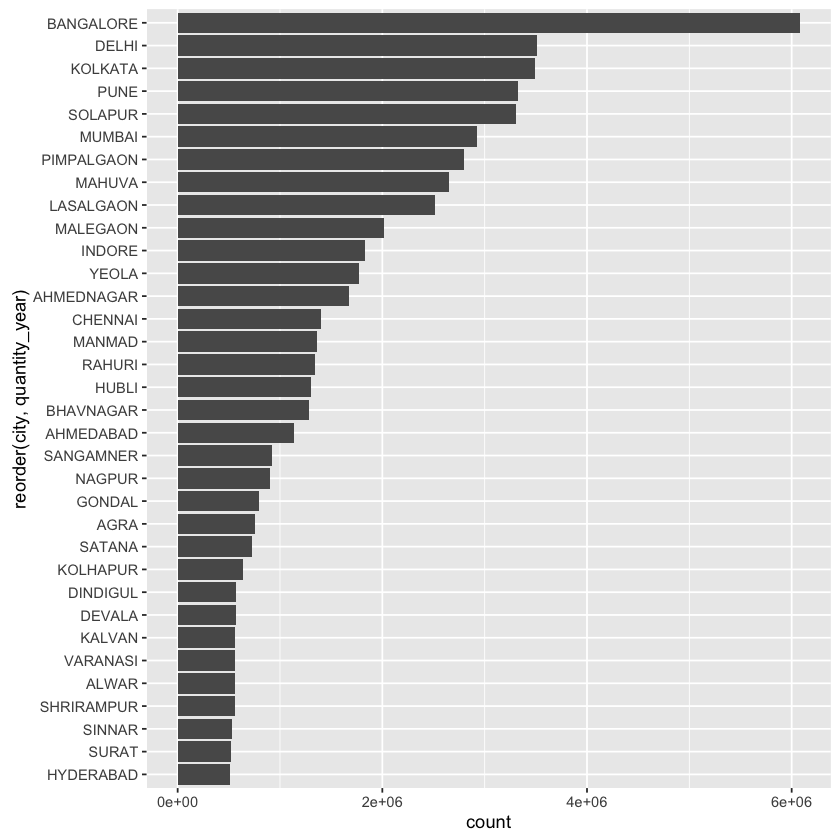

In [85]:
# Plot the Data
ggplot(df2010CitySmall) + aes(reorder(city, quantity_year), weight = quantity_year) + geom_bar() + coord_flip()

### Exercise: Find the State with Highest Quantity Sales in 2015?

## Question 2 - Have the price variation in Onion prices in Bangalore really gone up over the years?

In [23]:
head(df)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
1,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
2,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
3,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
4,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
5,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01
6,ABOHAR(PB),January,2013,675,1327,1900,1605,PB,ABOHAR,2013-01-01


In [24]:
dfBang <- df %>% filter(city == 'BANGALORE')

In [25]:
head(dfBang)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
1,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
2,BANGALORE,January,2005,335679,470,597,522,KNT,BANGALORE,2005-01-01
3,BANGALORE,January,2006,412185,286,617,537,KNT,BANGALORE,2006-01-01
4,BANGALORE,January,2007,268268,586,1167,942,KNT,BANGALORE,2007-01-01
5,BANGALORE,January,2008,393806,174,671,472,KNT,BANGALORE,2008-01-01
6,BANGALORE,January,2009,374380,848,1554,1328,KNT,BANGALORE,2009-01-01


In [26]:
summary(dfBang)

            market         month         year         quantity      
 BANGALORE     :146   February:13   Min.   :2004   Min.   :  63824  
 ABOHAR(PB)    :  0   January :13   1st Qu.:2007   1st Qu.: 329690  
 AGRA(UP)      :  0   April   :12   Median :2010   Median : 403530  
 AHMEDABAD(GUJ):  0   August  :12   Mean   :2010   Mean   : 523917  
 AHMEDNAGAR(MS):  0   December:12   3rd Qu.:2013   3rd Qu.: 661252  
 AJMER(RAJ)    :  0   July    :12   Max.   :2016   Max.   :1639032  
 (Other)       :  0   (Other) :72                                   
    priceMin         priceMax       priceMod        state             city    
 Min.   : 145.0   Min.   : 338   Min.   : 320   KNT    :146   BANGALORE :146  
 1st Qu.: 307.0   1st Qu.: 685   1st Qu.: 551   AP     :  0   ABOHAR    :  0  
 Median : 448.0   Median :1019   Median : 836   ASM    :  0   AGRA      :  0  
 Mean   : 557.5   Mean   :1314   Mean   :1044   BHR    :  0   AHMEDABAD :  0  
 3rd Qu.: 653.0   3rd Qu.:1636   3rd Qu.:1326   CH   

In [27]:
# Set the index as date
dfBang <- dfBang %>% 
          arrange(date)
head(dfBang)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
1,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
2,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01
3,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01
4,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01
5,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01
6,BANGALORE,June,2004,311445,486,621,551,KNT,BANGALORE,2004-06-01


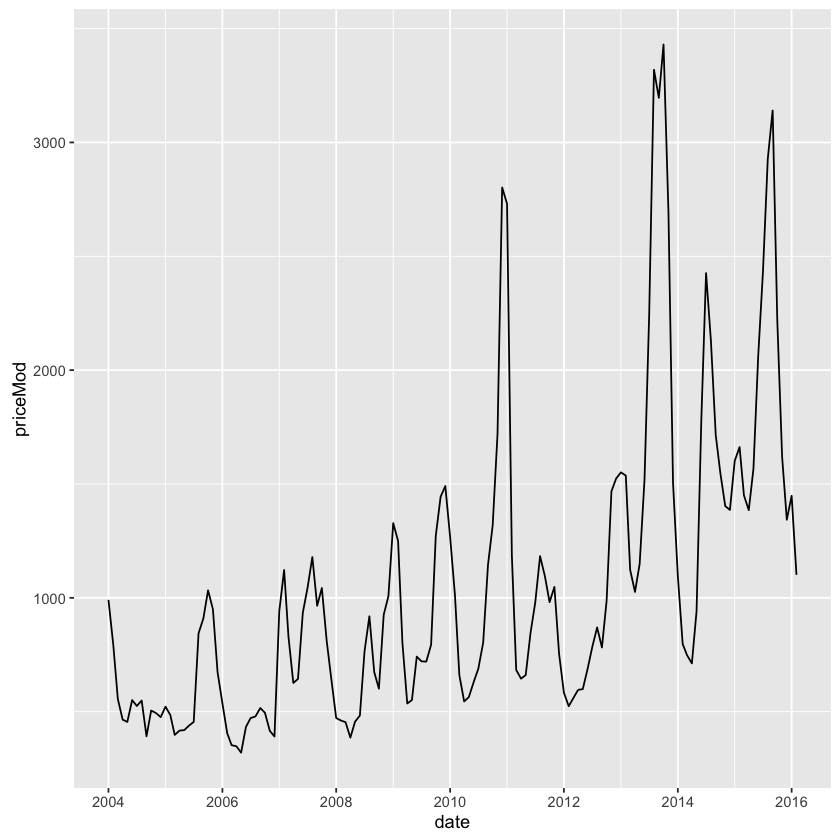

In [28]:
ggplot(dfBang) + aes(date, priceMod) + geom_line()

### From Wide to Tall  Dataframe

In [29]:
head(dfBang)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
1,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
2,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01
3,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01
4,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01
5,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01
6,BANGALORE,June,2004,311445,486,621,551,KNT,BANGALORE,2004-06-01


In [30]:
library(tidyr)

In [31]:
dfBangTall <- dfBang %>%
              gather("priceType", "priceValue", 5:7)

In [32]:
head(dfBangTall)

,market,month,year,quantity,state,city,date,priceType,priceValue
1,BANGALORE,January,2004,227832,KNT,BANGALORE,2004-01-01,priceMin,916
2,BANGALORE,February,2004,225133,KNT,BANGALORE,2004-02-01,priceMin,741
3,BANGALORE,March,2004,221952,KNT,BANGALORE,2004-03-01,priceMin,527
4,BANGALORE,April,2004,185150,KNT,BANGALORE,2004-04-01,priceMin,419
5,BANGALORE,May,2004,137390,KNT,BANGALORE,2004-05-01,priceMin,400
6,BANGALORE,June,2004,311445,KNT,BANGALORE,2004-06-01,priceMin,486


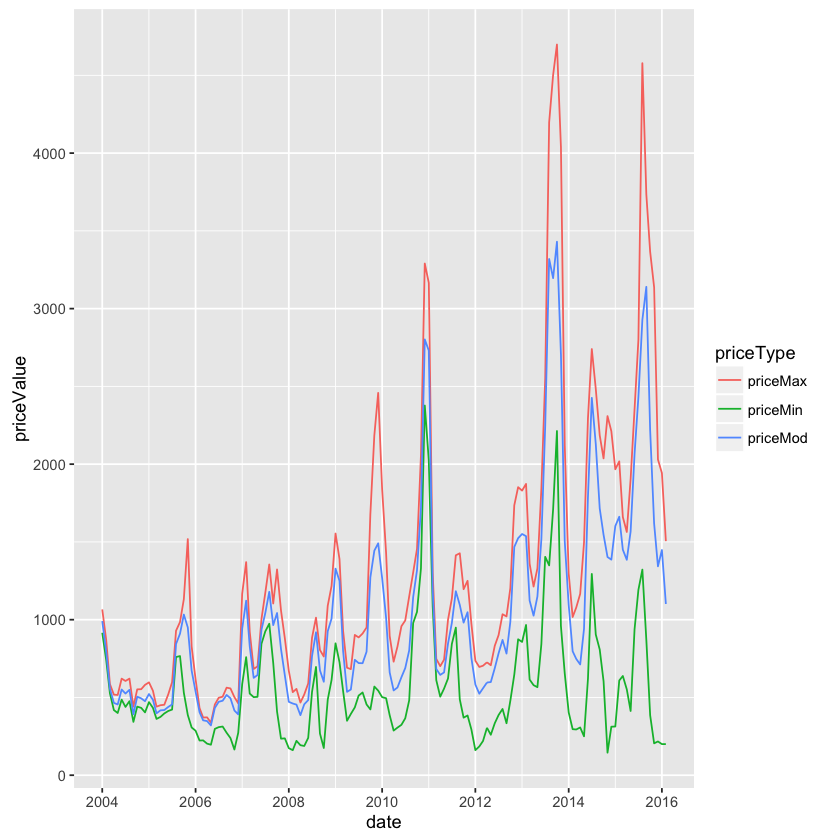

In [33]:
ggplot(dfBangTall) + aes(date, y = priceValue, color = priceType) + geom_line()

### PRINCIPLE: Mutate to create new variables
To calculate the range of change, we will create a new price difference variable - which is the difference between the priceMin and priceMax

In [34]:
dfBang <- dfBang %>% 
          mutate(priceDiff = priceMax - priceMin)

In [35]:
head(dfBang)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,priceDiff
1,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01,150
2,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01,129
3,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01,59
4,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01,99
5,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01,116
6,BANGALORE,June,2004,311445,486,621,551,KNT,BANGALORE,2004-06-01,135


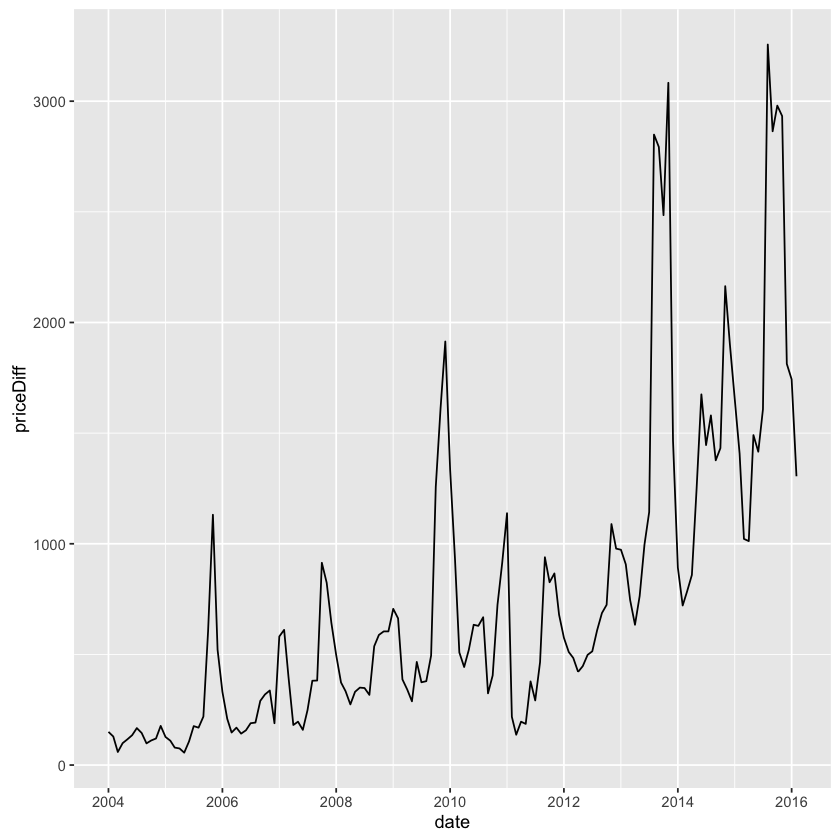

In [36]:
ggplot(dfBang) + aes(date, priceDiff) + geom_line()

### PRINCIPLE: Pivot Table

Pivot table is a way to summarize data frame data into index (rows), columns and value 

![](../img/pivot.png)

In [43]:
head(dfBang)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,priceDiff
1,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01,150
2,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01,129
3,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01,59
4,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01,99
5,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01,116
6,BANGALORE,June,2004,311445,486,621,551,KNT,BANGALORE,2004-06-01,135


In [53]:
library(lubridate)

In [54]:
# Create new variable for Integer Month
dfBang <- dfBang %>%
          mutate(monthVal = month(date))

In [55]:
head(dfBang)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,priceDiff,monthVal
1,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01,150,1
2,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01,129,2
3,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01,59,3
4,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01,99,4
5,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01,116,5
6,BANGALORE,June,2004,311445,486,621,551,KNT,BANGALORE,2004-06-01,135,6


In [66]:
dfBangPivot <- dfBang %>%
               group_by(year, monthVal) %>% 
               summarize(priceDiff) %>%
               spread(monthVal, priceDiff)

In [67]:
head(dfBangPivot)

,year,1,2,3,4,5,6,7,8,9,10,11,12
1,2004,150,129,59,99,116,135,167,145,98,111,120,177
2,2005,127,110,79,75,56,107,176,169,219,602,1131,521
3,2006,331,209,147,169,142,157,189,192,290,319,337,189
4,2007,581,611,398,181,196,159,248,381,382,914,824,643
5,2008,497,373,334,274,331,350,348,317,537,588,604,604
6,2009,706,663,387,341,288,466,374,379,495,1259,1616,1914


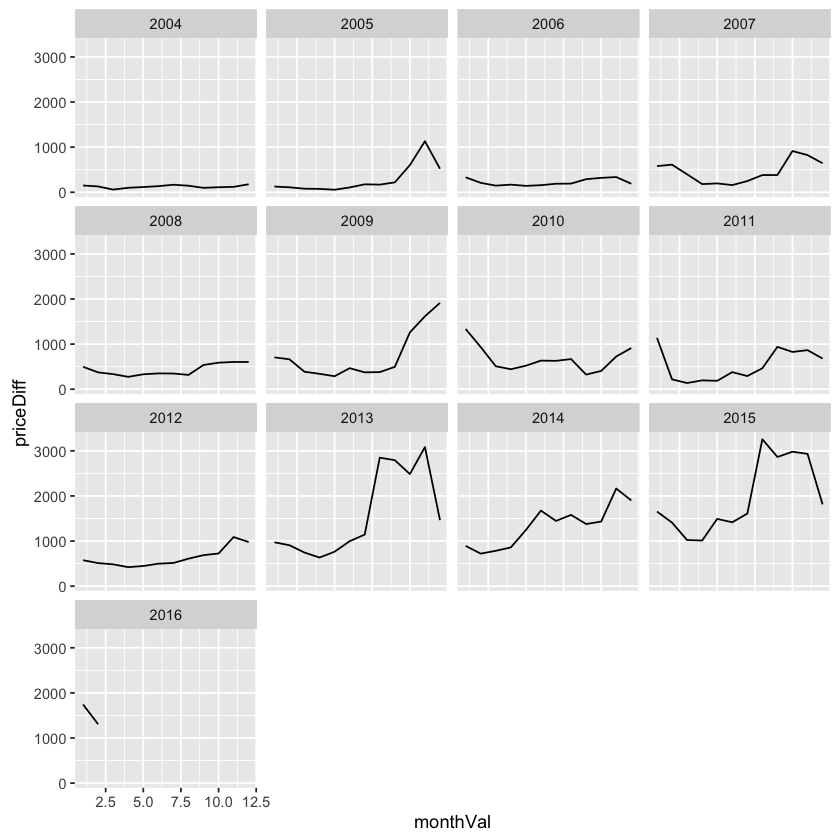

In [74]:
ggplot(dfBang) + aes(monthVal, priceDiff) + geom_line() + facet_wrap(~year)

### Exercise: Find the price variation for LASALGAON city? 